In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

Start by reading data

Analüüsi eesmärk on:
* klassi ennustamine
    * keskmise hinde ennustamist.
* andmestiku struktuuri kirjeldamine (dimensionaalsuse vähendamine, klasterdamine).
    * inimeste gruppidesse jagamine


In [96]:
columns = ["id","lastTested","totalCommits","totalTestsRan","totalTestsPassed","totalDiagnosticErrors","differentSlugs","differentCourses","commitsStyleOK","averageGrade","medianGrade"]
used_columns = ["totalCommits","totalTestsRan","totalTestsPassed","totalDiagnosticErrors","differentSlugs","differentCourses","commitsStyleOK","averageGrade","medianGrade"]

student_df = pd.read_csv("students.csv", 
                      header=1, 
                      names=columns)

student_df = student_df.drop(["id", "lastTested"], axis=1) # Drop fields that tell nothing
student_df

,totalCommits,totalTestsRan,totalTestsPassed,totalDiagnosticErrors,differentSlugs,differentCourses,commitsStyleOK,averageGrade,medianGrade
0,101,3008,2333,675,14,1,21,100.000000,100.00
1,42,1153,986,521,11,1,7,88.702727,100.00
2,143,4870,4337,1479,17,1,41,93.041176,100.00
3,363,9297,6691,3470,16,1,88,90.524375,100.00
4,29,324,142,288,4,1,3,84.167500,100.00
...,...,...,...,...,...,...,...,...,...
132,71,3271,2528,1459,12,1,12,89.525833,73.17
133,6,306,273,64,2,1,2,100.000000,100.00
134,10,186,150,109,10,1,5,82.000000,100.00
135,3,3,0,2,1,1,1,0.000000,0.00


In [97]:
print("Mean of __")
_ = [print(f"        {x} is: {student_df[x].mean()}") for x in used_columns]
print()

print("Median of __")
_ = [print(f"          {x} is: {student_df[x].median()}") for x in used_columns]
print()

print("Standard deviation of __")
_ = [print(f"                      {x} is: {student_df[x].std()}") for x in used_columns]
print()


Mean of __
        totalCommits is: 128.83211678832117
        totalTestsRan is: 3721.5255474452556
        totalTestsPassed is: 2778.1459854014597
        totalDiagnosticErrors is: 1415.970802919708
        differentSlugs is: 12.05109489051095
        differentCourses is: 1.051094890510949
        commitsStyleOK is: 38.81021897810219
        averageGrade is: 82.12413733476588
        medianGrade is: 86.01357664233576

Median of __
          totalCommits is: 102.0
          totalTestsRan is: 3255.0
          totalTestsPassed is: 2528.0
          totalDiagnosticErrors is: 1087.0
          differentSlugs is: 14.0
          differentCourses is: 1.0
          commitsStyleOK is: 21.0
          averageGrade is: 90.22466666666666
          medianGrade is: 100.0

Standard deviation of __
                      totalCommits is: 172.7492048735879
                      totalTestsRan is: 3929.5412770754288
                      totalTestsPassed is: 2519.1970375152623
                      totalDiag

Histogramms


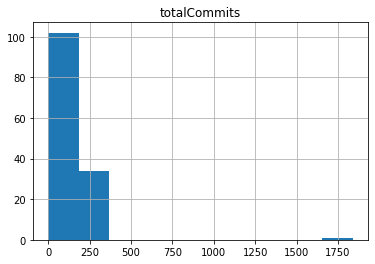

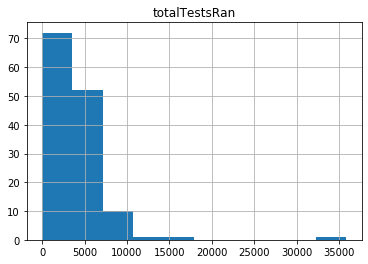

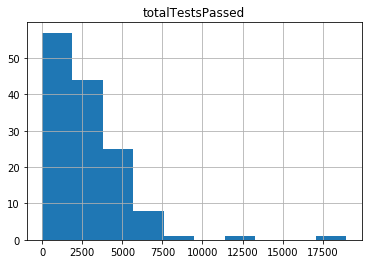

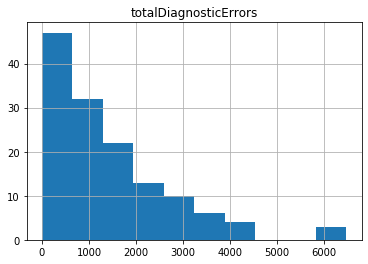

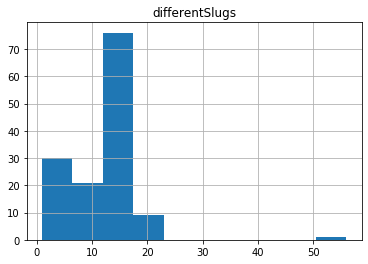

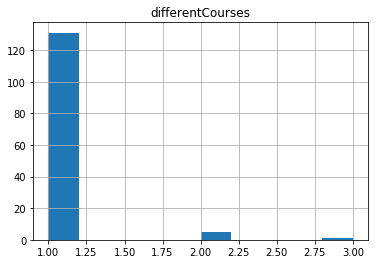

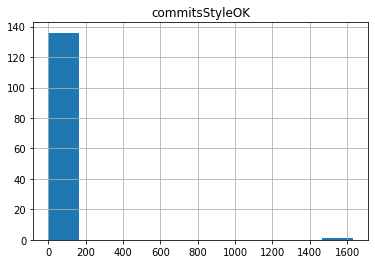

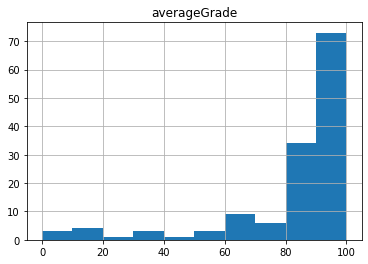

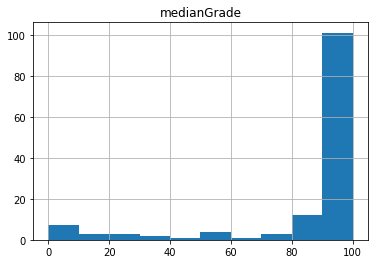

In [98]:
print("Histogramms")
_ = [student_df.hist(column=x) for x in used_columns] ## Bigger pictures this way


Pairplots


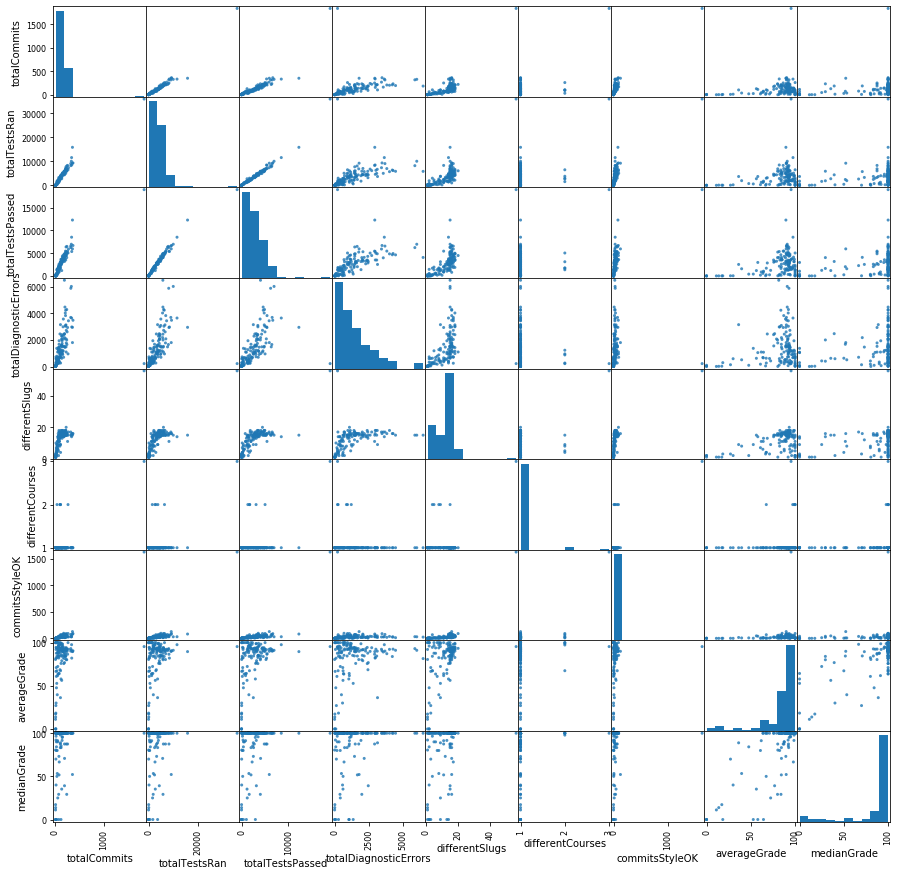

In [99]:
print("Pairplots")
grr = scatter_matrix(student_df,figsize = (15,15),alpha=0.8)
plt.show()

In [100]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

print("Correlation matrix")
student_df.corr(method=histogram_intersection)

Correlation matrix


,totalCommits,totalTestsRan,totalTestsPassed,totalDiagnosticErrors,differentSlugs,differentCourses,commitsStyleOK,averageGrade,medianGrade
totalCommits,1.0,17644.0,17637.0,16031.0,1651.0,144.0,5317.0,8945.7,9150.5
totalTestsRan,17644.0,1.0,380606.0,190103.0,1649.0,143.0,5317.0,11031.7,11519.3
totalTestsPassed,17637.0,380606.0,1.0,185694.0,1646.0,141.0,5314.0,10986.7,11435.2
totalDiagnosticErrors,16031.0,190103.0,185694.0,1.0,1651.0,144.0,3908.0,10940.6,11440.2
differentSlugs,1651.0,1649.0,1646.0,1651.0,1.0,144.0,1557.0,1646.0,1607.0
differentCourses,144.0,143.0,141.0,144.0,144.0,1.0,134.0,141.0,137.0
commitsStyleOK,5317.0,5317.0,5314.0,3908.0,1557.0,134.0,1.0,3732.1,3639.6
averageGrade,8945.7,11031.7,10986.7,10940.6,1646.0,141.0,3732.1,1.0,10663.4
medianGrade,9150.5,11519.3,11435.2,11440.2,1607.0,137.0,3639.6,10663.4,1.0


All in one plot


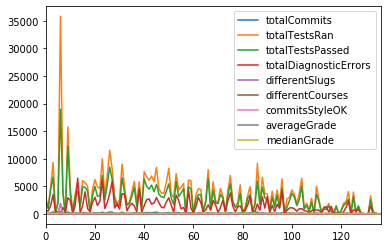

In [101]:
print("All in one plot")
_ = student_df.plot()